In [1]:
import numpy as np
import pandas
from sklearn import datasets
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import MDS

In [2]:
X, Y = datasets.load_digits(return_X_y=True)

In [10]:
model = PCA()
model.fit(X)
XT = model.transform(X)
print(X.shape)
print(XT.shape)

(1797, 64)
(1797, 64)


In [12]:
varexp = np.round(model.explained_variance_ratio_,2)
cvarexp = np.round(np.cumsum(model.explained_variance_ratio_),2)
print(varexp)
print(cvarexp)

[0.15 0.14 0.12 0.08 0.06 0.05 0.04 0.04 0.03 0.03 0.02 0.02 0.02 0.02
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]
[0.15 0.29 0.4  0.49 0.54 0.59 0.64 0.67 0.71 0.74 0.76 0.78 0.8  0.82
 0.84 0.85 0.86 0.88 0.89 0.89 0.9  0.91 0.92 0.93 0.93 0.94 0.94 0.95
 0.95 0.96 0.96 0.97 0.97 0.97 0.98 0.98 0.98 0.98 0.99 0.99 0.99 0.99
 0.99 0.99 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.  ]


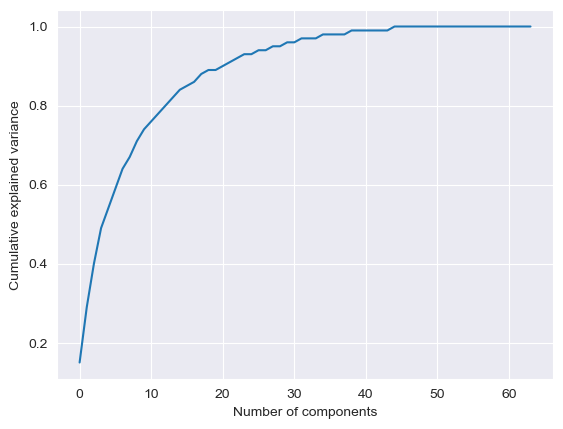

In [13]:
plt.figure()
plt.plot(cvarexp)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

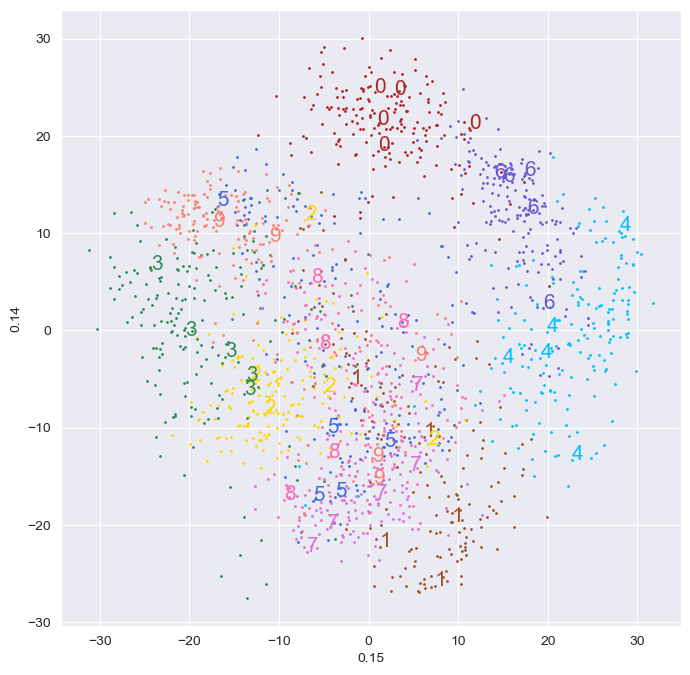

In [16]:
colors = ['firebrick','sienna','gold','seagreen','deepskyblue','royalblue','slateblue','orchid','hotpink','salmon']

plt.figure(figsize=(8,8))

for d in range(10):
    XTd = XT[Y==d,:]
    plt.scatter(XTd[:,0],XTd[:,1],s=1,c=colors[d])
    idx = np.random.permutation(len(XTd))[:5]
    for i in idx:
        plt.text(XTd[i,0],XTd[i,1],str(d),c=colors[d],fontsize=15)

plt.xlabel(str(varexp[0]))
plt.ylabel(str(varexp[1]))

plt.show()

In [17]:
def fmin(n1,n2,n3):
    if n1 <= n2 and n1 <= n3: return n1
    if n2 <= n1 and n2 <= n3: return n2
    else: return n3
def levenshtein(s1,s2):
    n1 = len(s1)
    n2 = len(s2)
    d = np.zeros((n1+1,n2+2))
    for i in range(1,n1+1):
        d[i,0] = i
    for j in range(1,n2+1):
        d[0,j] = j
    for i in range(1,n1+1):
        for j in range(1,n2+1):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            d[i,j] = fmin(d[i-1,j]+1,d[i,j-1]+1,d[i-1,j-1]+cost)
    return d[n1,n2]

In [18]:
words = ['universidad','panamericana','estudiar','inteligencia','inteligente','persona',
         'educacion','investigacion','investigadora','ingenieria','licenciatura']
mdist = np.zeros((len(words),len(words)),int)
for w1 in range(len(words)):
    for w2 in range(w1,len(words)):
        word1 = words[w1]
        word2 = words[w2]
        mdist[w1,w2] = mdist[w2,w1] = levenshtein(word1,word2)
print(mdist)

[[ 0  8  9  9 10  7 10  9  8  8 10]
 [ 8  0 10  9  9  7 10 11 10  8 11]
 [ 9 10  0 10  9  7  7  9  9  8  9]
 [ 9  9 10  0  3  9 10  7  7  5  9]
 [10  9  9  3  0  9 10  8  8  6 10]
 [ 7  7  7  9  9  0  8 11 10  8 10]
 [10 10  7 10 10  8  0  7 11 10 10]
 [ 9 11  9  7  8 11  7  0  4  8 10]
 [ 8 10  9  7  8 10 11  4  0  8  8]
 [ 8  8  8  5  6  8 10  8  8  0  8]
 [10 11  9  9 10 10 10 10  8  8  0]]


In [19]:
model = MDS(n_components=2,dissimilarity='precomputed')
XT = model.fit_transform(mdist)
print(XT)

[[-1.04846469 -5.47578208]
 [ 5.35974319 -4.71961509]
 [-4.08979721 -1.36653678]
 [ 4.03304303  3.06418326]
 [ 5.43279034  2.24348092]
 [ 1.36443365 -5.52988917]
 [-6.34760688 -3.12825533]
 [-1.35817391  5.13051531]
 [ 0.29591275  5.75360692]
 [ 2.33802241  0.2461158 ]
 [-5.97990268  3.78217623]]


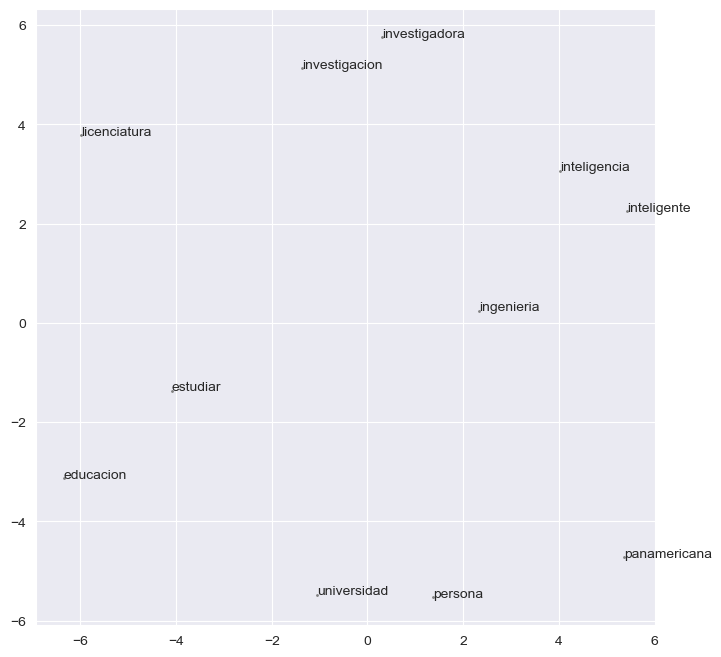

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(XT[:,0],XT[:,1],s=1,c='gray')
for w,word in enumerate(words):
    plt.text(XT[w,0],XT[w,1],word)
plt.show()